<a href="https://colab.research.google.com/github/Yash040599203/Cancer-Prediction/blob/main/Copy_of_minor2_MAINSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RUN this
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
#RUN this
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)


Mounted at /content/gdrive/


In [ ]:
#RUN this
path = "/content/gdrive/My Drive/data/"

In [ ]:
dataset = pd.read_csv(path+'data.csv')
X = dataset.iloc[:,2:32].values
Y = dataset.iloc[:,1].values

FileNotFoundError: ignored

In [ ]:
print(dataset)

In [ ]:
print(X)#data values

In [ ]:
print(Y)#target values

In [ ]:
X.shape

(569, 30)

In [ ]:
Y.shape

(569,)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean',verbose=0) 
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

NameError: ignored

In [ ]:

from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
Y[:]=labelencoder_Y.fit_transform(Y[:])

In [ ]:

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:

Y=Y.astype(int)
np.save(path+'x_data.npy',X)
np.save(path+'y_data.npy',Y)


In [ ]:
#RUN this
X = np.load(path+'x_data.npy')


NameError: ignored

In [ ]:
#RUN this
Y = np.load(path+'y_data.npy')

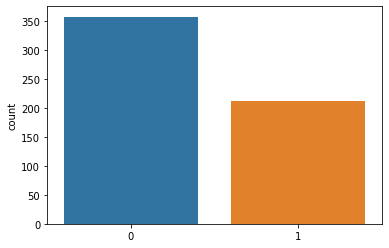

In [ ]:
import seaborn as sns
sns.countplot(Y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y ,test_size=0.2,random_state=0)

In [ ]:
x_train

array([[1.005e+01, 1.753e+01, 6.441e+01, ..., 6.499e-02, 2.894e-01,
        7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, ..., 7.485e-02, 2.965e-01,
        7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, ..., 1.129e-01, 2.778e-01,
        7.012e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [ ]:
x_test

array([[1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, ..., 6.005e-02, 2.444e-01,
        6.788e-02],
       [1.402e+01, 1.566e+01, 8.959e+01, ..., 8.216e-02, 2.136e-01,
        6.710e-02],
       ...,
       [2.018e+01, 1.954e+01, 1.338e+02, ..., 2.173e-01, 3.032e-01,
        8.075e-02],
       [1.831e+01, 2.058e+01, 1.208e+02, ..., 1.510e-01, 3.074e-01,
        7.863e-02],
       [1.504e+01, 1.674e+01, 9.873e+01, ..., 1.018e-01, 2.177e-01,
        8.549e-02]])

In [ ]:
y_train

NameError: ignored

In [ ]:
y_test

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred0 = classifier.predict(x_test)

In [ ]:
y_pred0

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
cm = confusion_matrix(y_test.astype(int), y_pred0) predo

[63,4]

In [ ]:
cm

array([[63,  4],
       [ 3, 44]])

In [ ]:
acc=accuracy_score(y_test,y_pred0)
pre=average_precision_score(y_test,y_pred0)
f1=f1_score(y_test,y_pred0)
print(acc,pre,f1)

0.9385964912280702 0.8844718178424785 0.9263157894736843


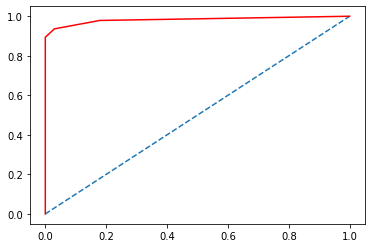

In [ ]:
pr = classifier.predict_proba(x_test)
pr=pr[:,1]
fpr,tpr,thresh=roc_curve(y_test,pr)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,color="red")

In [ ]:
auc=roc_auc_score(y_test,pr)
print(auc)

0.9823753572562717


In [ ]:
print(thresh)

[2.  1.  0.8 0.6 0.4 0.2 0. ]


In [ ]:
xt1=x_train
xte=x_test

In [ ]:
from sklearn.preprocessing import StandardScaler standard scaler
sc_x = StandardScaler();
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test) sc_x.transform(x_test)

In [ ]:
# Fitting K-NN to the Training set (normalised)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [ ]:
cm1 = confusion_matrix(y_test.astype(int), y_pred)

In [ ]:
cm1

array([[67,  0],
       [ 5, 42]])

In [ ]:
acc1=accuracy_score(y_test,y_pred)
pre1=average_precision_score(y_test,y_pred)
f11=f1_score(y_test,y_pred)
print(acc1,pre1,f11)

0.956140350877193 0.9374766703994027 0.9438202247191011


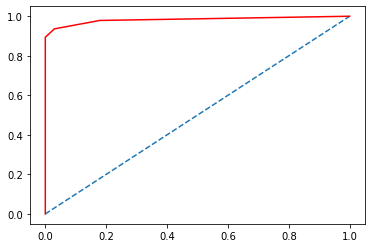

In [ ]:
pr1 = classifier.predict_proba(x_test)
pr1=pr1[:,1]
fpr1,tpr1,thresh1=roc_curve(y_test,pr1)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr1,tpr1,color="red")

In [ ]:
auc1=roc_auc_score(y_test,pr1)
print(auc1)

0.9823753572562717


In [ ]:
from sklearn.externals import joblib 
joblib.dump(classifier, path+'knn.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/gdrive/My Drive/data/knn.pkl']

In [ ]:
knn_from_joblib = joblib.load(path+'knn.pkl') 

In [ ]:
y_pred = knn_from_joblib.predict(x_test)
cm6_6 = confusion_matrix(y_test.astype(int), y_pred)

In [ ]:
cm6_6

array([[67,  0],
       [ 5, 42]])

In [ ]:
#Svm Classified (Normalised Data)
from sklearn.svm import SVC
svc_model= SVC(probability=True)
svc_model.fit(x_train,y_train.astype(int))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred1 =svc_model.predict(x_test)

In [ ]:
y_pred1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [ ]:
cm2 = confusion_matrix(y_test.astype(int), y_pred)

In [ ]:
cm2

array([[67,  0],
       [ 5, 42]])

In [ ]:
acc2=accuracy_score(y_test,y_pred1)
pre2=average_precision_score(y_test,y_pred1)
f12=f1_score(y_test,y_pred1)
print(acc2,pre2,f12)

0.9824561403508771 0.9749906681597611 0.9782608695652174


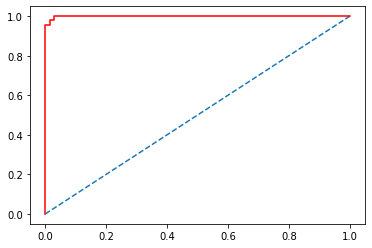

In [ ]:
pr2 = svc_model.predict_proba(x_test)
pr2=pr2[:,1]
fpr2,tpr2,thresh2=roc_curve(y_test,pr2)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr2,tpr2,color="red")

In [ ]:
auc2=roc_auc_score(y_test,pr2)
print(auc2)

0.9990473166084471


In [ ]:
lst = [17.99,10.08,122.8,100,0.11,0.2,0.3,0.1,0.2,0.07,1,1,8,153,0,0.04,0.05,0.01,0.03,0,25,17,184,2019,0.16,0.66,0.56,0.2,0.4,0.1]
arr=np.array(lst)

In [ ]:
arr1=[arr]

In [ ]:
yp=classifier.predict(arr1)

In [ ]:
yp

array([1])

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train.astype(int))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred2=logistic.predict(x_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [ ]:
cm3 = confusion_matrix(y_test, y_pred2)
cm3

array([[65,  2],
       [ 2, 45]])

In [ ]:
acc3=accuracy_score(y_test,y_pred2)
pre3=average_precision_score(y_test,y_pred2)
f13=f1_score(y_test,y_pred2)
print(acc3,pre3,f13)

0.9649122807017544 0.9342482507763298 0.9574468085106385


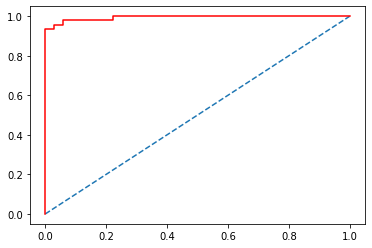

In [ ]:
pr3 = logistic.predict_proba(x_test)
pr3=pr3[:,1]
fpr3,tpr3,thresh3=roc_curve(y_test,pr3)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr3,tpr3,color="red")

In [ ]:
auc3=roc_auc_score(y_test,pr3)
print(auc3)

0.9933312162591299


In [ ]:
#kernel svm
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf',probability=True)
ksvm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred3=ksvm.predict(x_test)
y_pred3

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [ ]:
cm4 = confusion_matrix(y_test, y_pred3)
cm4

array([[67,  0],
       [ 2, 45]])

In [ ]:
acc4=accuracy_score(y_test,y_pred3)
pre4=average_precision_score(y_test,y_pred3)
f14=f1_score(y_test,y_pred3)
print(acc4,pre4,f14)

0.9824561403508771 0.9749906681597611 0.9782608695652174


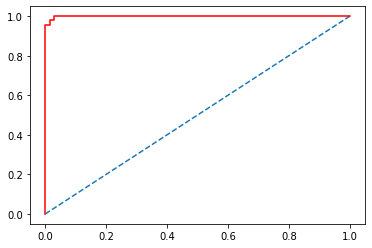

In [ ]:
pr4 = ksvm.predict_proba(x_test)
pr4=pr4[:,1]
fpr4,tpr4,thresh4=roc_curve(y_test,pr4)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr4,tpr4,color="red")

In [ ]:
auc4=roc_auc_score(y_test,pr4)
print(auc4)

0.9990473166084471


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred4=nb.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [ ]:
cm5 = confusion_matrix(y_test, y_pred4)
cm5

array([[61,  6],
       [ 5, 42]])

In [ ]:
acc5=accuracy_score(y_test,y_pred4)
pre5=average_precision_score(y_test,y_pred4)
f15=f1_score(y_test,y_pred4)
print(acc5,pre5,f15)

0.9035087719298246 0.8257745427398283 0.8842105263157894


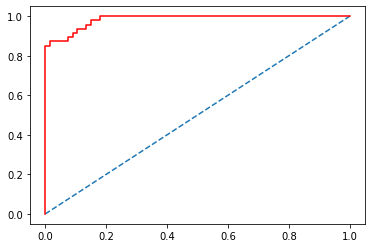

In [ ]:
pr5 = nb.predict_proba(x_test)
pr5=pr5[:,1]
fpr5,tpr5,thresh5=roc_curve(y_test,pr5)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr5,tpr5,color="red")

In [ ]:
auc5=roc_auc_score(y_test,pr5)
print(auc5)

0.9841219434741189


In [ ]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred5=dt.predict(x_test)
y_pred5

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test,y_pred5)
cm6

array([[63,  4],
       [ 2, 45]])

In [ ]:
acc6=accuracy_score(y_test,y_pred5)
pre6=average_precision_score(y_test,y_pred5)
f16=f1_score(y_test,y_pred5)
print(acc6,pre6,f16)

0.9473684210526315 0.8968317450160356 0.9375000000000001


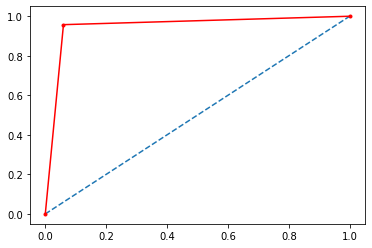

In [ ]:
pr6 = dt.predict_proba(x_test)
pr6=pr6[:,1]
fpr6,tpr6,thresh6=roc_curve(y_test,pr6)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr6,tpr6,marker=".",color="red")

In [ ]:
auc=roc_auc_score(y_test,pr6)
print(auc)

0.9488726579866625


In [ ]:
# random forest (no.of trees=10)
from sklearn.ensemble import RandomForestClassifier
rf10 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf10.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred6=rf10.predict(x_test)
y_pred6

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
cm7=confusion_matrix(y_test,y_pred6)
cm7

array([[63,  4],
       [ 3, 44]])

In [ ]:
acc7=accuracy_score(y_test,y_pred6)
pre7=average_precision_score(y_test,y_pred6)
f17=f1_score(y_test,y_pred6)
print(acc7,pre7,f17)

0.9385964912280702 0.8844718178424785 0.9263157894736843


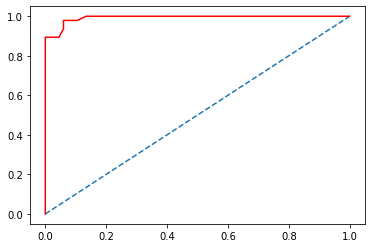

In [ ]:
pr7 = rf10.predict_proba(x_test)
pr7=pr7[:,1]
fpr7,tpr7,thresh7=roc_curve(y_test,pr7)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr7,tpr7,color="red")

In [ ]:
auc7=roc_auc_score(y_test,pr7)
print(auc7)

0.9926960939980947


In [ ]:
# random forest (no.of trees=100)
from sklearn.ensemble import RandomForestClassifier
rf100 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf100.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred7=rf100.predict(x_test)
y_pred7

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
cm8=confusion_matrix(y_test,y_pred7)
cm8

array([[66,  1],
       [ 1, 46]])

In [ ]:
acc8=accuracy_score(y_test,y_pred7)
pre8=average_precision_score(y_test,y_pred7)
f18=f1_score(y_test,y_pred7)
print(acc8,pre8,f18)

0.9824561403508771 0.9666714318616823 0.9787234042553191


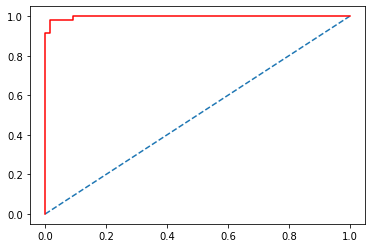

In [ ]:
pr8 = rf100.predict_proba(x_test)
pr8=pr8[:,1]
fpr8,tpr8,thresh8=roc_curve(y_test,pr8)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr8,tpr8,color="red")

In [ ]:
from sklearn.metrics import roc_auc_score
auc8=roc_auc_score(y_test,pr8)
print(auc8)

0.9971419498253414


In [ ]:
# random forest (no.of trees=200)
rf200 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy')
rf200.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred8=rf200.predict(x_test)
y_pred8

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [ ]:
cm9=confusion_matrix(y_test,y_pred8)
cm9

array([[66,  1],
       [ 1, 46]])

In [ ]:
acc9=accuracy_score(y_test,y_pred8)
pre9=average_precision_score(y_test,y_pred8)
f19=f1_score(y_test,y_pred8)
print(acc9,pre9,f19)

0.9824561403508771 0.9666714318616823 0.9787234042553191


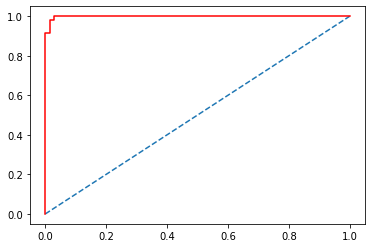

In [ ]:
pr9 = rf200.predict_proba(x_test)
pr9=pr9[:,1]
fpr9,tpr9,thresh9=roc_curve(y_test,pr9)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr9,tpr9,color="red")

In [ ]:
auc9=roc_auc_score(y_test,pr9)
print(auc9)

0.9984121943474118


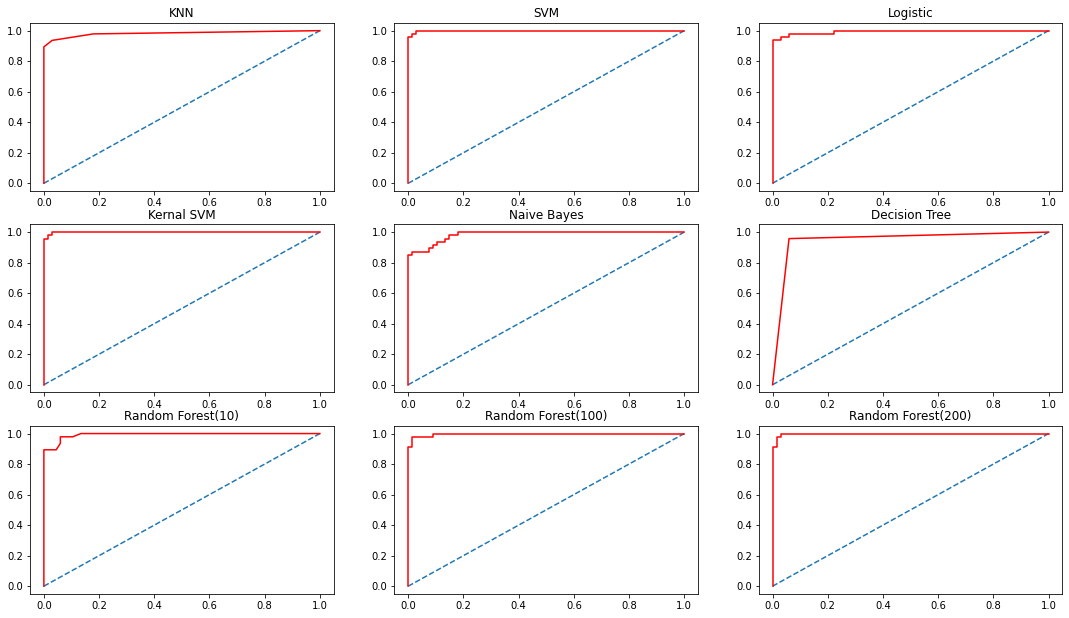

In [ ]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].set_title('KNN')
axs[0,0].plot([0,1],[0,1],linestyle="--")
axs[0,0].plot(fpr1,tpr1,color="red")

axs[0, 1].set_title('SVM')
axs[0,1].plot([0,1],[0,1],linestyle="--")
axs[0,1].plot(fpr2,tpr2,color="red")

axs[0, 2].set_title('Logistic')
axs[0,2].plot([0,1],[0,1],linestyle="--")
axs[0,2].plot(fpr3,tpr3,color="red")

axs[1,0].set_title('Kernal SVM')
axs[1,0].plot([0,1],[0,1],linestyle="--")
axs[1,0].plot(fpr4,tpr4,color="red")

axs[1,1].set_title('Naive Bayes')
axs[1,1].plot([0,1],[0,1],linestyle="--")
axs[1,1].plot(fpr5,tpr5,color="red")

axs[1,2].set_title('Decision Tree')
axs[1,2].plot([0,1],[0,1],linestyle="--")
axs[1,2].plot(fpr6,tpr6,color="red")

axs[2,0].set_title('Random Forest(10)')
axs[2,0].plot([0,1],[0,1],linestyle="--")
axs[2,0].plot(fpr7,tpr7,color="red")

axs[2,1].set_title('Random Forest(100)')
axs[2,1].plot([0,1],[0,1],linestyle="--")
axs[2,1].plot(fpr8,tpr8,color="red")

axs[2,2].set_title('Random Forest(200)')
axs[2,2].plot([0,1],[0,1],linestyle="--")
axs[2,2].plot(fpr9,tpr9,color="red")